In [35]:
import numpy as np
import matplotlib.pyplot as plt

#### 定义目标函数 

In [60]:
def target_func(x):
    return np.sin(x) + 0.5 * np.cos(3 * x) + 0.2 * np.abs(x)

#### 生成数据集

In [62]:
def generate_data(start, end, num_train, num_test):
    x_train = np.linspace(start, end, num_train).reshape(-1, 1)
    y_train = target_func(x_train)
    
    x_test = np.linspace(start - 0.5, end + 0.5, num_test).reshape(-1, 1)
    y_test = target_func(x_test)
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = generate_data(-5, 5, 1000, 200)

#### 定义 ReLU 激活函数及其导数

In [65]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

#### 初始化网络参数

In [68]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)  # He initialization
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
    b2 = np.zeros((1, output_size))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

#### 前向传播

In [71]:
def forward(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # Linear activation for output layer
    return {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}, parameters


#### 计算损失（MSE）

In [74]:
def compute_loss(Y_pred, Y_true):
    m = Y_true.shape[0]
    loss = np.sum((Y_pred - Y_true) ** 2) / (2 * m)
    return loss

#### 反向传播

In [77]:
def backward(X, Y, cache, parameters, learning_rate):
    m = X.shape[0]
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    W2 = parameters['W2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(cache['Z1'])
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    # 更新参数
    parameters['W1'] -= learning_rate * dW1
    parameters['b1'] -= learning_rate * db1
    parameters['W2'] -= learning_rate * dW2
    parameters['b2'] -= learning_rate * db2
    
    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return parameters, grads

#### 训练网络

In [80]:
def train(X_train, Y_train, X_test, Y_test, input_size, hidden_size, output_size, epochs, learning_rate):
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    losses = []
    
    for epoch in range(epochs):
        cache, _ = forward(X_train, parameters)
        loss = compute_loss(cache['A2'], Y_train)
        parameters, _ = backward(X_train, Y_train, cache, parameters, learning_rate)
        losses.append(loss)
        
        if (epoch + 1) % 200 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
    
    return parameters, losses

#### 预测及可视化

Epoch 200/2000, Loss: 0.2626
Epoch 400/2000, Loss: 0.2190
Epoch 600/2000, Loss: 0.1794
Epoch 800/2000, Loss: 0.1470
Epoch 1000/2000, Loss: 0.1235
Epoch 1200/2000, Loss: 0.1080
Epoch 1400/2000, Loss: 0.0981
Epoch 1600/2000, Loss: 0.0916
Epoch 1800/2000, Loss: 0.0871
Epoch 2000/2000, Loss: 0.0839


TypeError: unhashable type: 'dict'

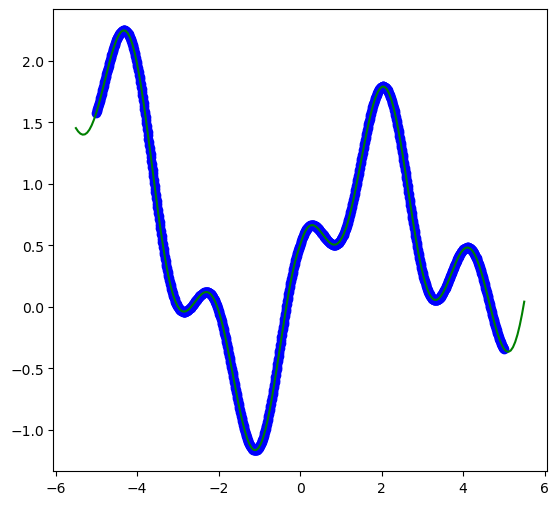

In [83]:
def predict(X, parameters):
    _, predictions = forward(X, parameters)
    return predictions
def plot_results(x_train, y_train, x_test, y_test, y_pred, losses):
    plt.figure(figsize=(14, 6))
    
    # 拟合效果
    plt.subplot(1, 2, 1)
    plt.scatter(x_train, y_train, color='blue', label='训练数据')
    plt.plot(x_test, y_test, color='green', label='真实函数')
    plt.plot(x_test, y_pred, color='red', linestyle='--', label='网络预测')
    plt.legend()
    plt.title('拟合效果')
    
    # 损失曲线
    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('损失')
    plt.title('训练损失曲线')
    plt.show()

# 参数设置
input_size = 1
hidden_size = 64
output_size = 1
epochs = 2000
learning_rate = 0.01

# 训练网络
trained_params, losses = train(x_train, y_train, x_test, y_test, input_size, hidden_size, output_size, epochs, learning_rate)

# 进行预测
y_pred = predict(x_test, trained_params)

# 绘制结果
plot_results(x_train, y_train, x_test, y_test, y_pred, losses)